In [1]:
R.home()

[1] "/home/chensijie/software/anaconda3/envs/r40py38/lib/R"

In [10]:
suppressPackageStartupMessages({
    library(Seurat)
    library(dplyr)
    library(SeuratDisk)
    library(ggpubr)
    library(tictoc)
    library(future)
    library(ComplexHeatmap)
    library(circlize)
    library("Nebulosa")
})

o <- function(w,h){
    options(repr.plot.width=w, repr.plot.height=h)
}

In [3]:
load("t.cd4.rda")
ls()

[1] "o"     "t.cd4"

In [4]:
# 1.1 Êî∂ÈõÜË°®ËææÁü©Èòµ
mat  = GetAssayData(t.cd4, slot = "data", assay = "RNA")

# 1.2 ÊääÁªÜËÉûÊåâÊüêÁßçÊÉ≥Ë¶ÅÁöÑÈ°∫Â∫èÊéíÂ•Ω
ordered.cells <- rownames(t.cd4@meta.data)

# 1.3 ÈÄâÊã©‰∏ÄÂàóÊÑüÂÖ¥Ë∂£ÁöÑÂü∫Âõ†Áî®‰∫éÁªòÂõæ
features.sel <-  unique(c("PTPRC","PECAM1","COL1A1","EPCAM", "ITGAX","ITGAM",
                          "TRAC","TRBC1",'TRBC2', "TRDC","TRGC1","TRGC2",
                          "CD79A","MS4A1","CD3D","CD3E","CD4","CD8A","CD8B","TBX21","TRAC","TRBC1",'TRBC2',
                          "TRDC","TRGC1","TRGC2",
                          "NCAM1","FCGR3A",
                          "GATA3","RORC","FOXP3","CTLA4","TCF7","LEF1",
           "IL2RA",'CD44','CD69',"SELL",'IL7R',"CD27","CD28","CCR7","KIT",
           "ITGAE","NKG7","IFNG","PRF1",'GZMA','GZMB',"GZMK","IL17A","IL23R",
            "CD40LG","TOX2","ICOS","PDCD1",
            "ISG15","IFIT1","IFIT2","IFIT3", "CXCR6","CCR6",
            'TNF', 'IL4'))

# 1.4 ÈáçÊñ∞ÁªÑÁªáÂéüÂßãÁü©ÈòµÊåâË°åÂàó
mat = as.matrix( mat[features.sel, ordered.cells] )


sub_grp
  1   2   3   4   5   6   7   8 
 62 195 136  57  40  65  48  39 

'magick' package is suggested to install to give better rasterization.

Set `ht_opt$message = FALSE` to turn off this message.



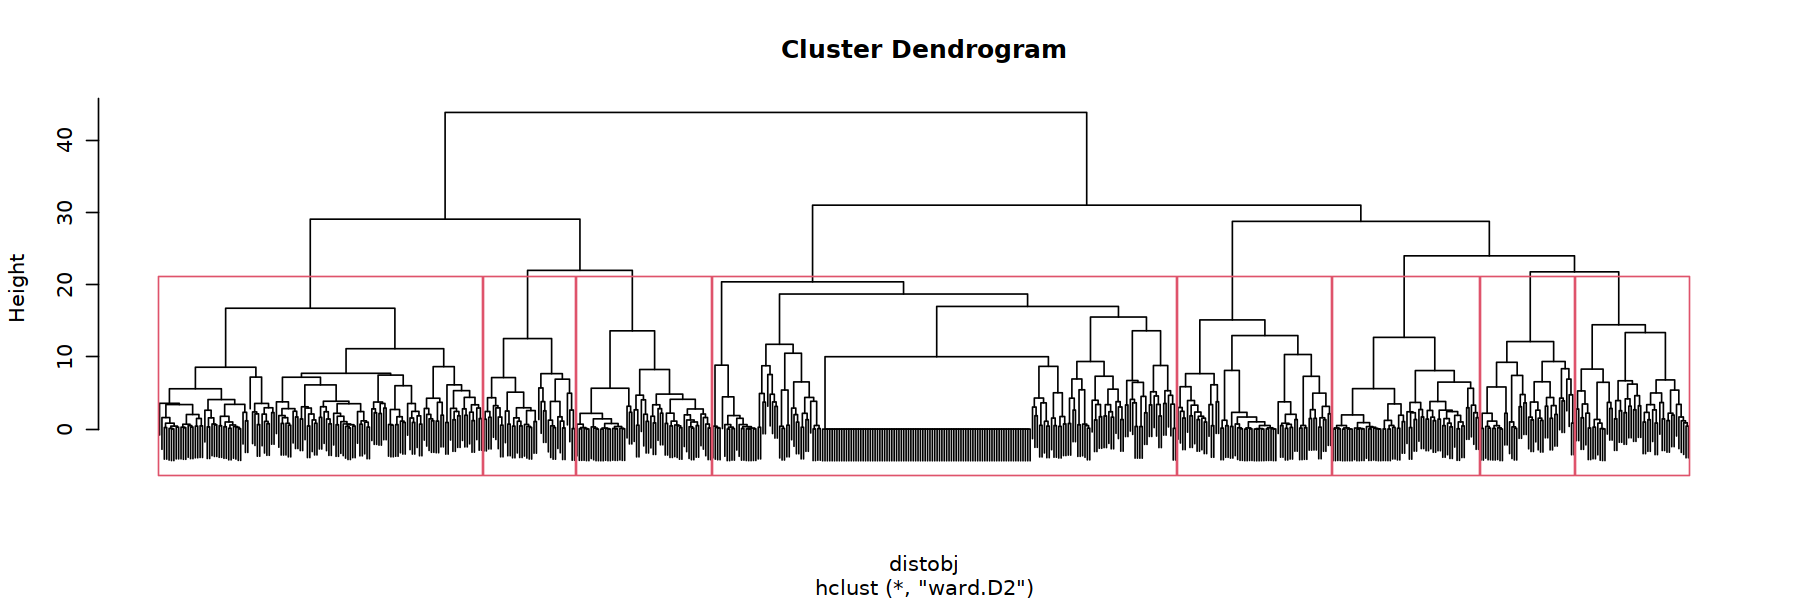

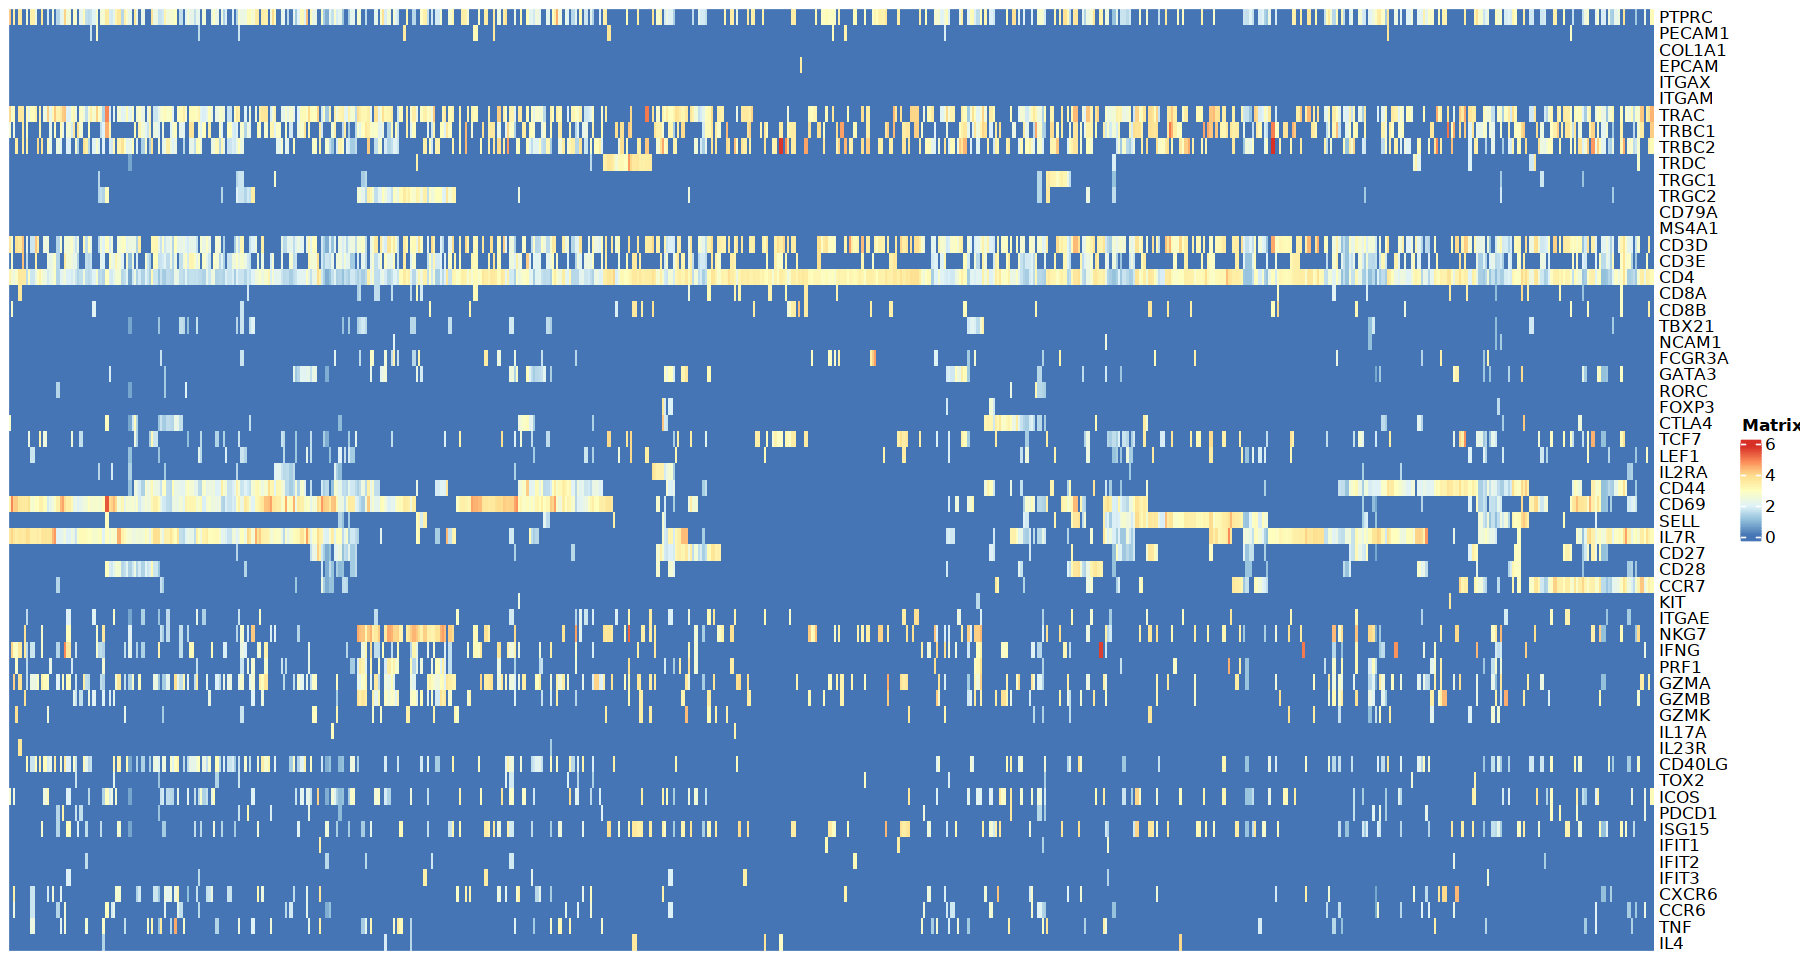

In [15]:
# 2.1 Â±ÇÊ¨°ËÅöÁ±ª
## Ê≥®ÊÑèÔºåmatÊòØ‰ªéSeuratÊù•ÁöÑfeature-by-sampleÁü©ÈòµÔºåÂ∫îËØ•ËΩ¨ÁΩÆÊàêsample-by-featureÁü©ÈòµÔºõ
## Ê≠§Â§ÑÈÄâÊã©‰∏Ä‰∫õÂü∫Âõ†ÂÅöËÅöÁ±ªÔºåÁÑ∂ÂêéÁî®Âè¶‰∏Ä‰∫õÂü∫Âõ†Áîªzheng
distobj   <- dist(t(mat[c("IL2RA",'CD44','CD69',"SELL",'IL7R',"CD27","CD28","CCR7","TRDC","TRGC1","TRGC2",
                         "GATA3","RORC","FOXP3","CTLA4","TBX21") , ]), method = "euclidean")
hclustobj <- hclust(distobj, method = "ward.D2" )

# 2.2 ÂàáÈöîÊ†ëÂΩ¢ÊàêËÅöÁ±ª
sub_grp <- cutree(hclustobj, k = 8) #ÂèÇÊï∞kÁõ¥Êé•ÊåáÂÆöÁ±ªÂà´Êï∞,‰πüÂèØÁî®ÂèÇÊï∞hÊåáÂÆöÂàáÂâ≤Ê∑±Â∫¶
# ÊâìÂç∞ÂêÑÁ±ªÈáåÁöÑÁªÜËÉûÊï∞ÁúãÁúã
table(sub_grp) 
# ÊâìÂç∞ËÅöÁ±ªÊ†ëÁúãÁúã
options(repr.plot.width=15, repr.plot.height=5)
plot(hclustobj, cex = 0.1, label=F) #Áîªüå≤Ôºålabel=FÈöêËóèÊ†∑Êú¨ÂêçÔºå‰∏çÁÑ∂ËøáÂØÜ‰∏çÁæéËßÇ
rect.hclust(hclustobj, k = 8) #ÁîªÊñπÊ°Ü
# ÊåâËÅöÁ±ªÊ†ëÈ°∫Â∫èÁîªheatmapÁúãÁúã
library(pheatmap)
options(repr.plot.width=15, repr.plot.height=8)
pheatmap(mat[,hclustobj$order], cluster_rows =F, cluster_cols = F, 
         border_color=NA,
         show_colnames = F, use_raster=TRUE)

# ÁúãÁúãË¶ÅÊòØËøòË°åÔºåÂ∞±ÊääÂ±ÇÊ¨°ËÅöÁ±ªÁöÑÁªìÊûúÊ†áÁ≠æÂºÑËøõmetadataÂéª
t.cd4@meta.data["CD4sub"]<-as.character(sub_grp)


In [20]:
meta = t.cd4@meta.data[ordered.cells,]


library(paletteer)  
cl_levels = unique(meta$subgroup)
blockcol = paletteer_d("ggsci::default_igv")[1:length(cl_levels)] %>% as.vector
names(blockcol) <-cl_levels


colann <- HeatmapAnnotation(
    cluster = meta$cluster,
    organ   = meta$organ,
    subgroup= meta$CD4sub,
    #col = list( subgroup = blockcol ),
    annotation_legend_param=list(
        cluster = list(nrow=5),
        organ = list(nrow=3),
        subgroup=list(nrow=1)
    )
)

In [21]:
hm<-Heatmap(mat, name = "Normalized expression", 
        cluster_rows = T, 
        cluster_columns = hclustobj, show_column_names=FALSE,
        column_dend_height = unit(4, "cm"),
        
        #column_split=meta$organ, cluster_column_slices=T,
        col= colorRamp2(c(0,1.5,3), c("#486E9E", "white", "#D84B59")),
        column_title_rot=90, column_gap=unit(2, "mm"),
        top_annotation=colann, heatmap_legend_param = list(direction = "horizontal"),
        use_raster = TRUE)

'magick' package is suggested to install to give better rasterization.

Set `ht_opt$message = FALSE` to turn off this message.



In [23]:
options(warn=-1)
options(repr.plot.width=20, repr.plot.height=20)
cairo_pdf("CD4.hm.pdf",width=15, height = 18)
draw(hm,
     padding = unit(c(10, 10, 30, 3), "mm"), #‰∏äÂè≥‰∏ãÂ∑¶
     merge_legend = TRUE,
     heatmap_legend_side = "bottom", 
     annotation_legend_side = "bottom")
dev.off()

png 
  2

In [24]:
seu <- t.cd4
seu <- FindVariableFeatures(seu, selection.method = "vst", nfeatures=1000,verbose=F)
seu <- ScaleData(seu, features = rownames(seu), verbose=F, block.size=1000, min.cells.to.block=200)
seu <- RunPCA(seu, features = VariableFeatures(object = seu), npcs = 50,verbose=F)
seu <- RunUMAP(seu, dims = 1:50, verbose = F, n.neighbors = 20L, min.dist = 0.2)
seu -> t.cd4 

In [44]:
t.cd4 <- FindNeighbors(t.cd4, dims = 1:20)
t.cd4 <- FindClusters(t.cd4, resolution = 0.9)


Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 642
Number of edges: 30840

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.6584
Number of communities: 6
Elapsed time: 0 seconds


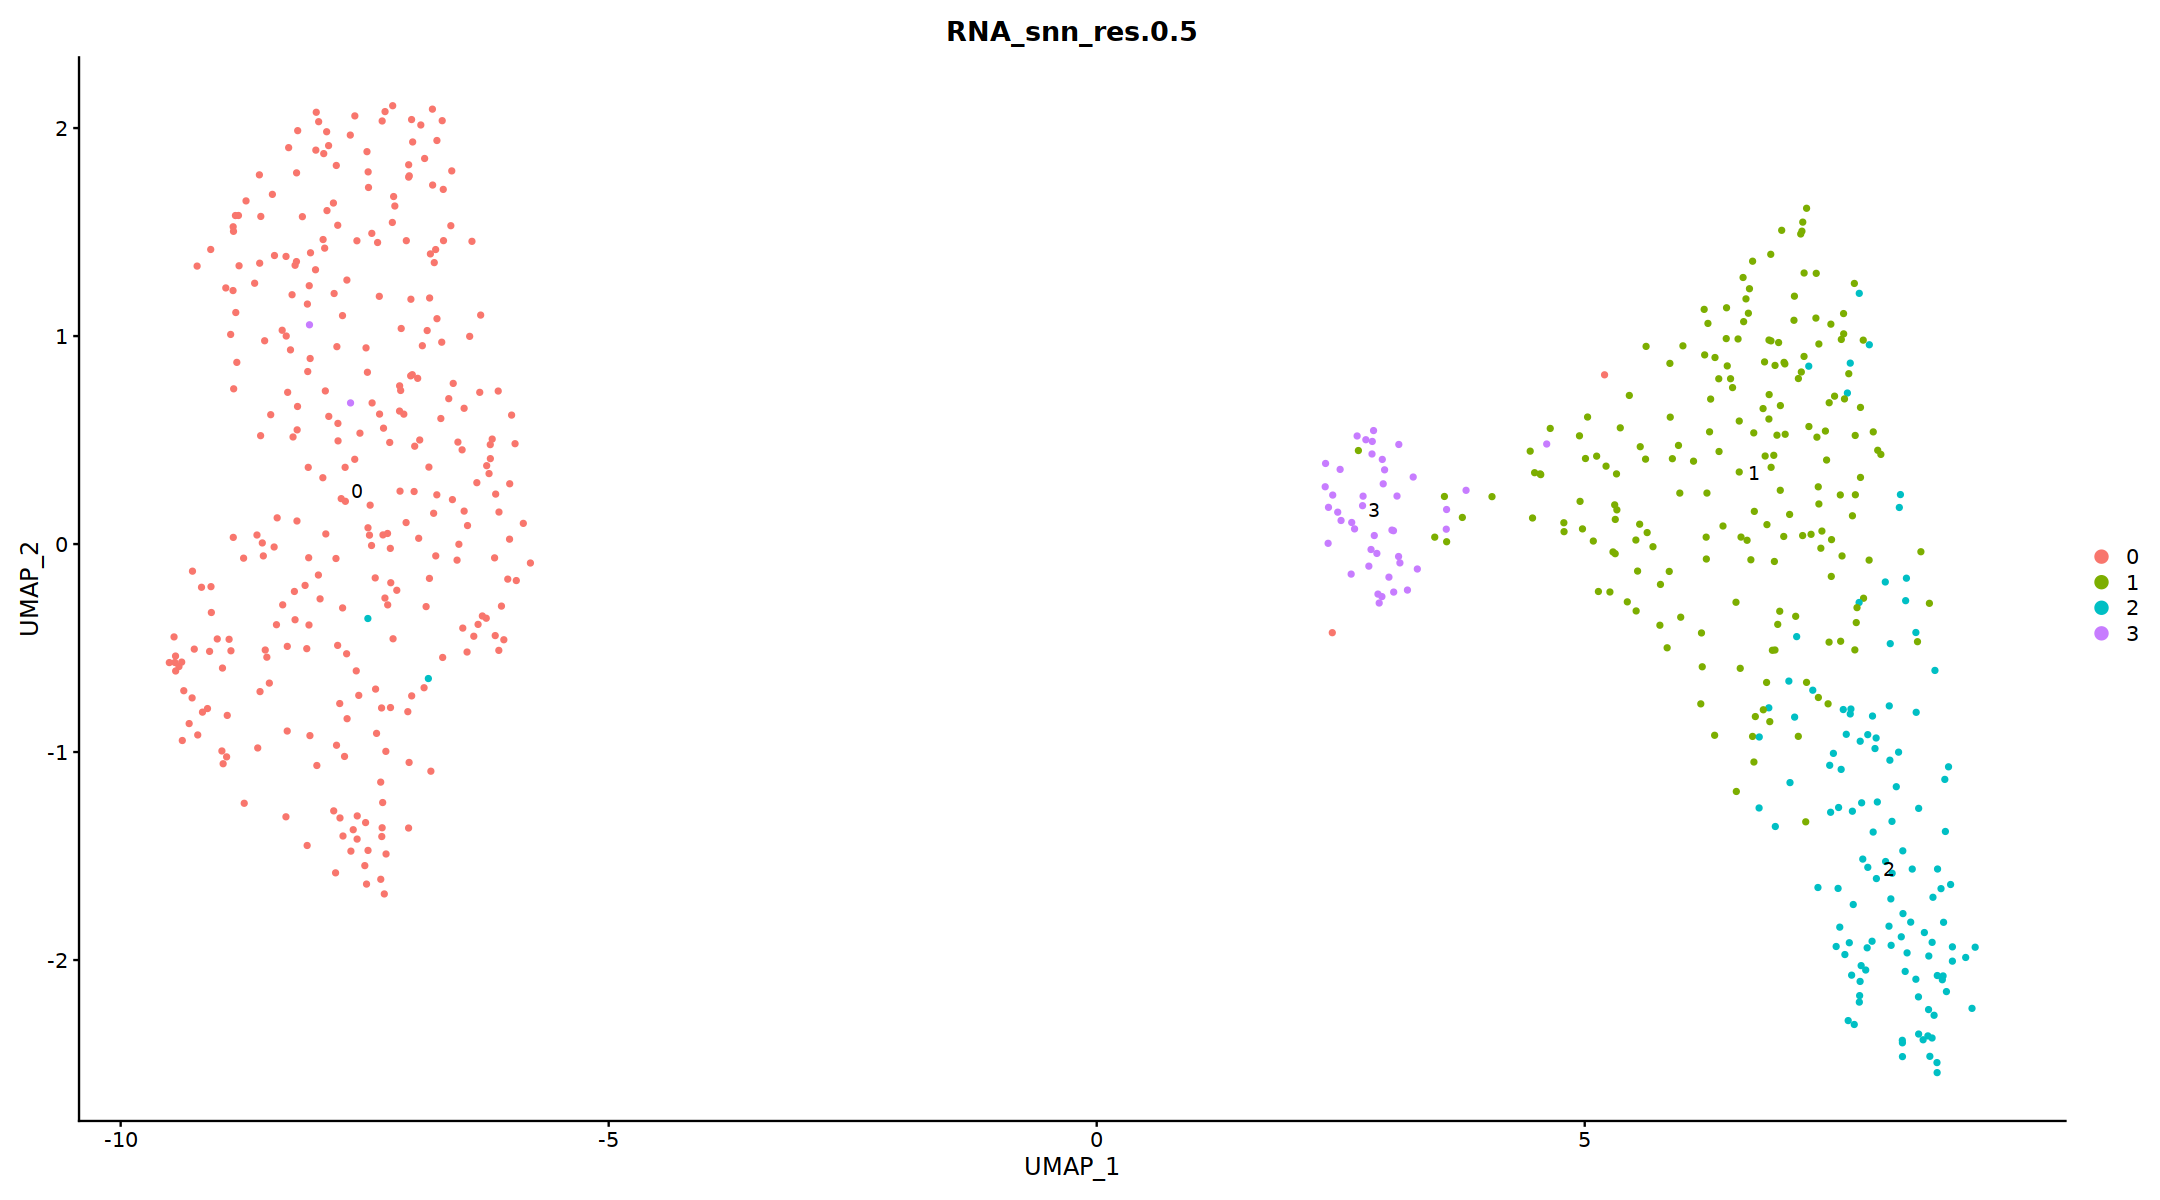

In [55]:
o(18,10)
DimPlot(t.cd4, group.by="RNA_snn_res.0.5", label=T)

In [56]:
Idents(t.cd4)<-"RNA_snn_res.0.5"
cd4.sub.markers<-FindAllMarkers(t.cd4, only.pos = T)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3



In [57]:
cd4.sub.markers%>%filter(avg_log2FC>1 & p_val_adj<0.005) %>%
group_by(cluster)%>%top_n(wt = avg_log2FC, n=5)

p_val        avg_log2FC pct.1 pct.2 p_val_adj    cluster gene   
1  3.649786e-54 3.985754   0.549 0.009 1.601453e-49 0       RPL9P8 
2  2.029726e-46 3.824495   0.478 0.003 8.906031e-42 0       GAS5   
3  2.686898e-42 3.660422   0.447 0.006 1.178957e-37 0       SNHG5  
4  5.213132e-27 3.196263   0.292 0.000 2.287418e-22 0       MT-TW  
5  1.695852e-26 3.273406   0.298 0.006 7.441058e-22 0       MT-RNR1
6  5.559851e-54 2.133304   0.984 0.500 2.439551e-49 1       MALAT1 
7  8.272889e-48 2.191185   0.952 0.452 3.629978e-43 1       CXCR4  
8  7.375418e-41 2.037411   0.758 0.217 3.236186e-36 1       HSPA1B 
9  1.309134e-33 1.901737   0.774 0.287 5.744218e-29 1       JUN    
10 4.136047e-28 1.972301   0.441 0.081 1.814815e-23 1       ANKRD28
11 4.986368e-31 1.319215   0.966 0.738 2.187918e-26 2       RPL41  
12 6.277935e-30 1.284935   0.974 0.686 2.754632e-25 2       EEF1A1 
13 3.021273e-26 1.342470   0.966 0.681 1.325674e-21 2       RPS4X  
14 5.503870e-26 1.283889   0.983 0.719 2.414988e-21 2       RPS6   
15 1.009888e-24 1.227159   0.957 0.683 4.431189e-20 2       RPL34  
16 1.986304e-64 3.213817   0.911 0.064 8.715506e-60 3       GZMH   
17 1.200539e-57 4.263174   0.933 0.101 5.267724e-53 3       GNLY   
18 5.358140e-47 3.367172   0.978 0.156 2.351044e-42 3       NKG7   
19 6.127079e-35 3.114572   0.556 0.042 2.688440e-30 3       CCL4L2 
20 3.727708e-27 3.176649   0.933 0.236 1.635644e-22 3       CCL4

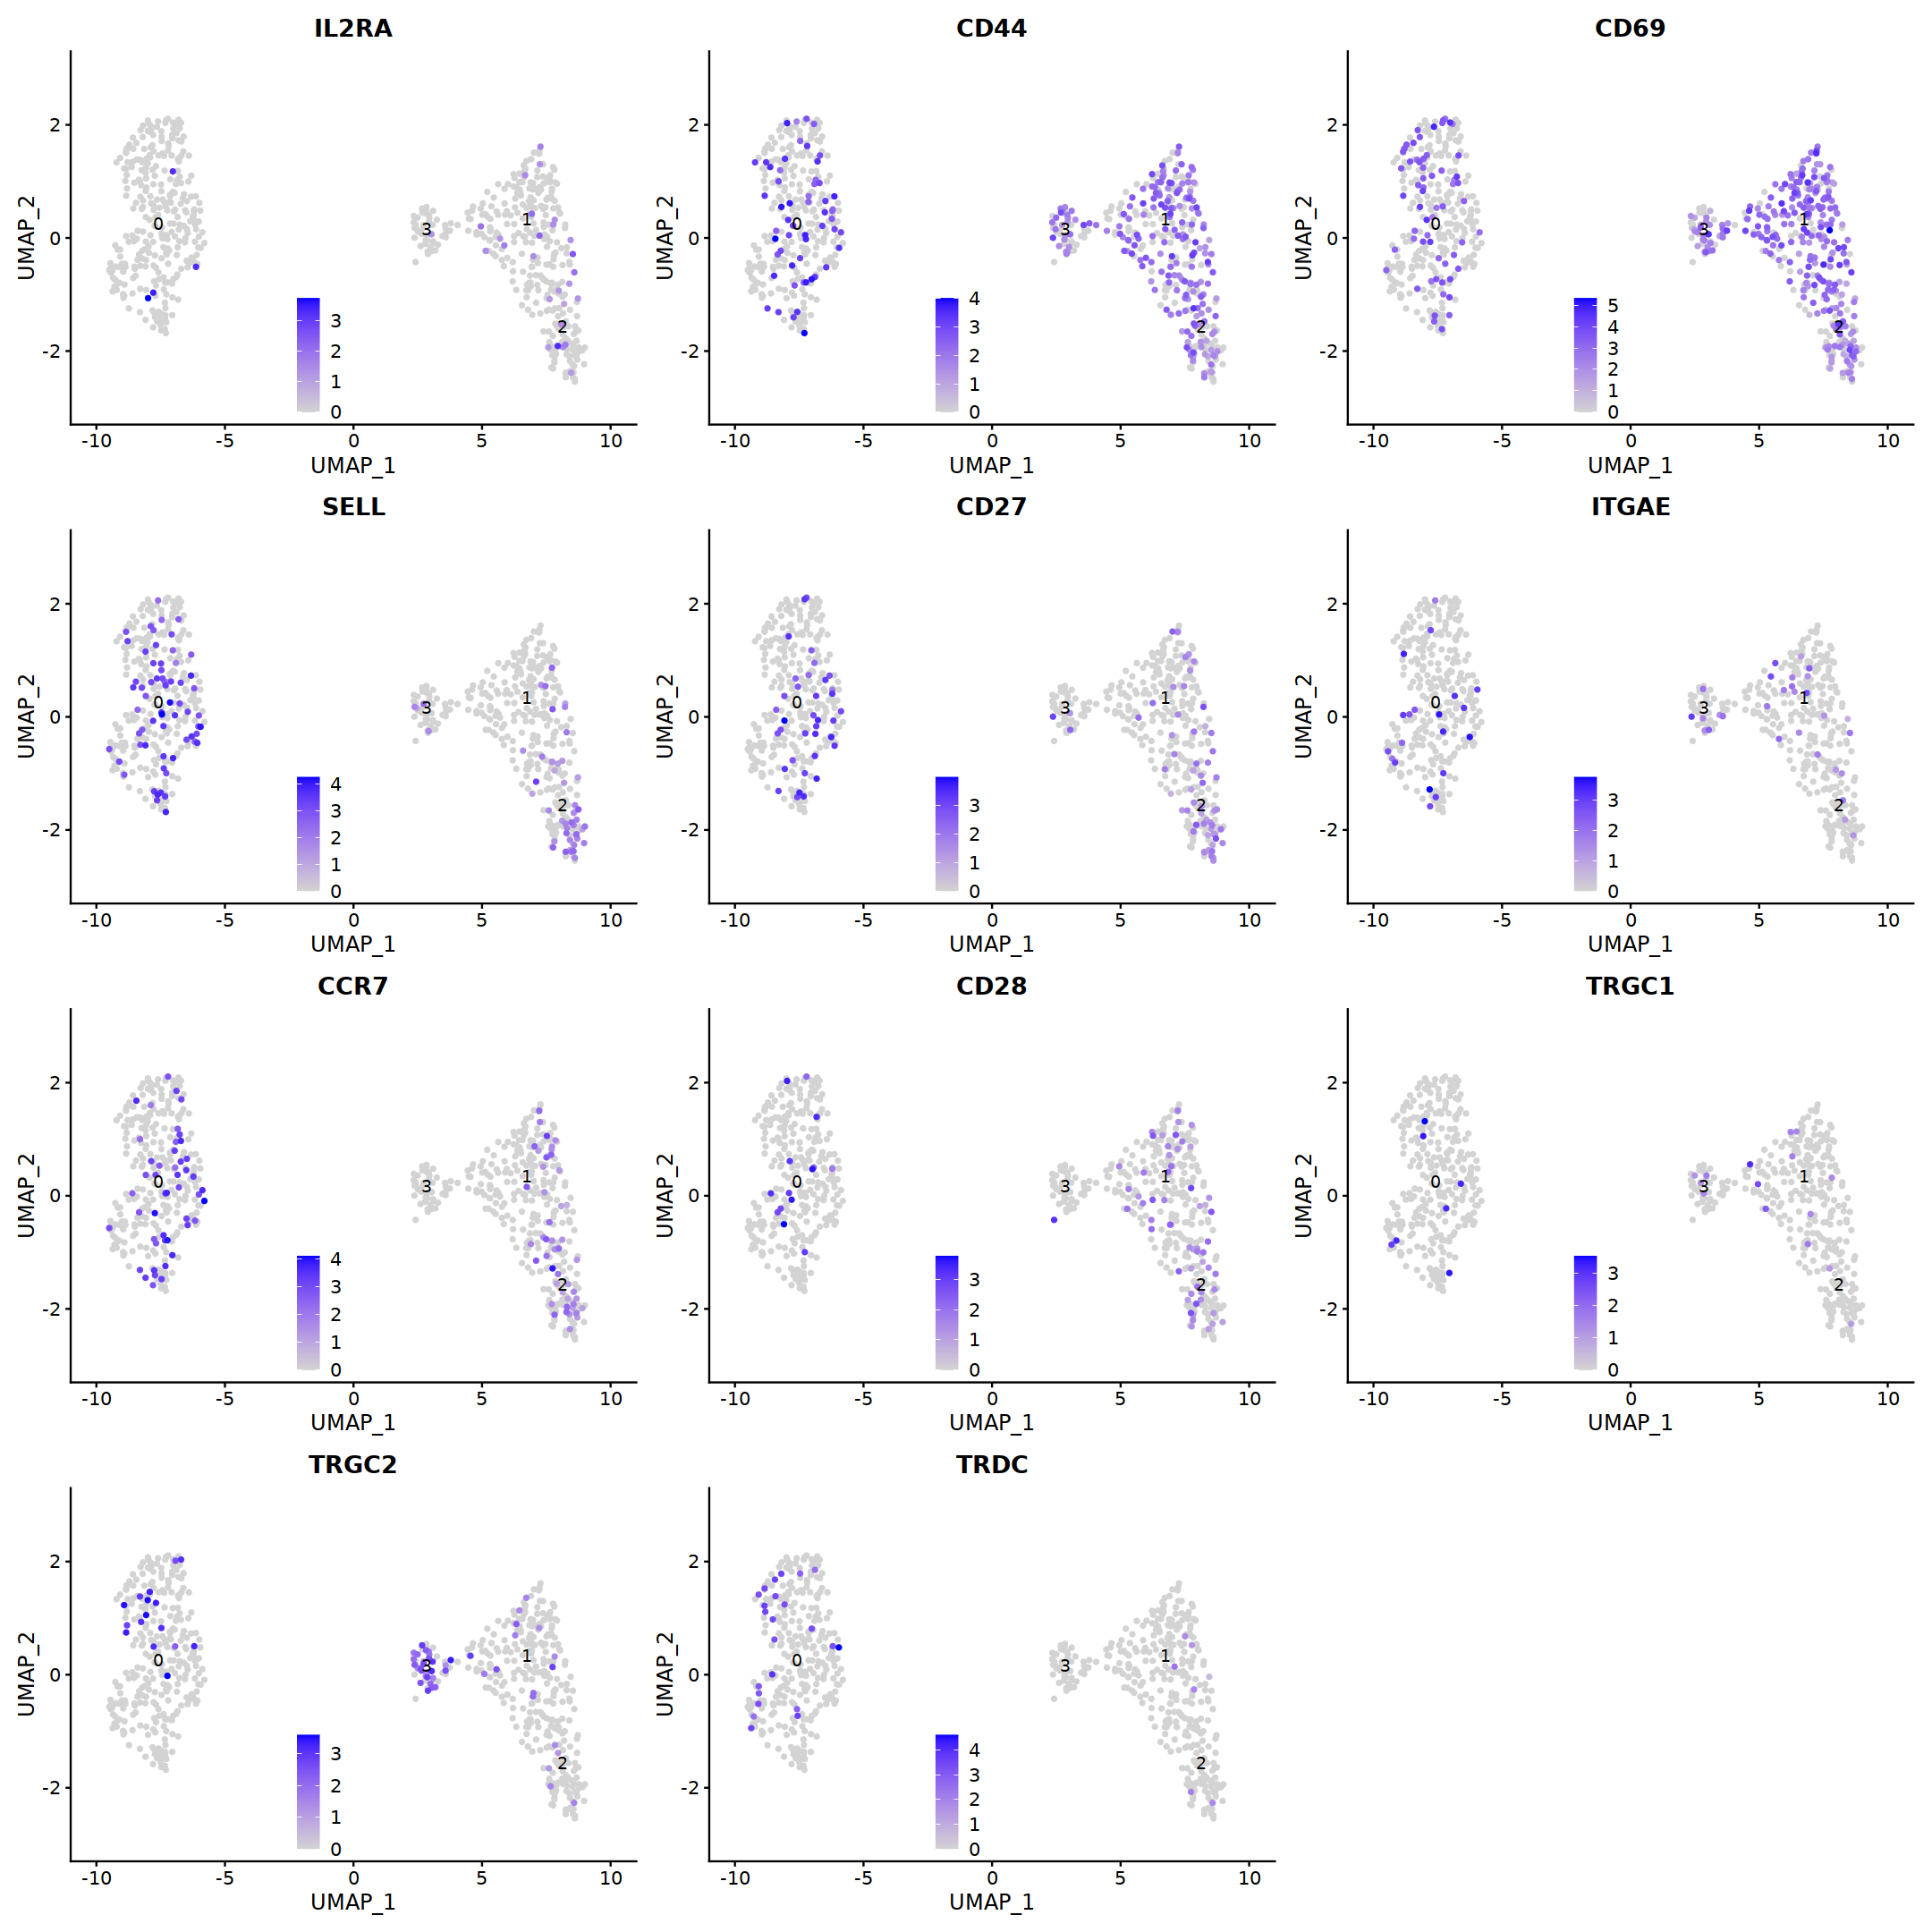

In [78]:
o(6*3, 6*3)
Idents(t.cd4)<-"RNA_snn_res.0.5"
FeaturePlot(t.cd4,order=T,n=3,  label=T,
            features = c("IL2RA","CD44","CD69","SELL","CD27","ITGAE","CCR7","CD28","TRGC1","TRGC2","TRDC")
           )&theme(legend.position = c(0.4,0.2))

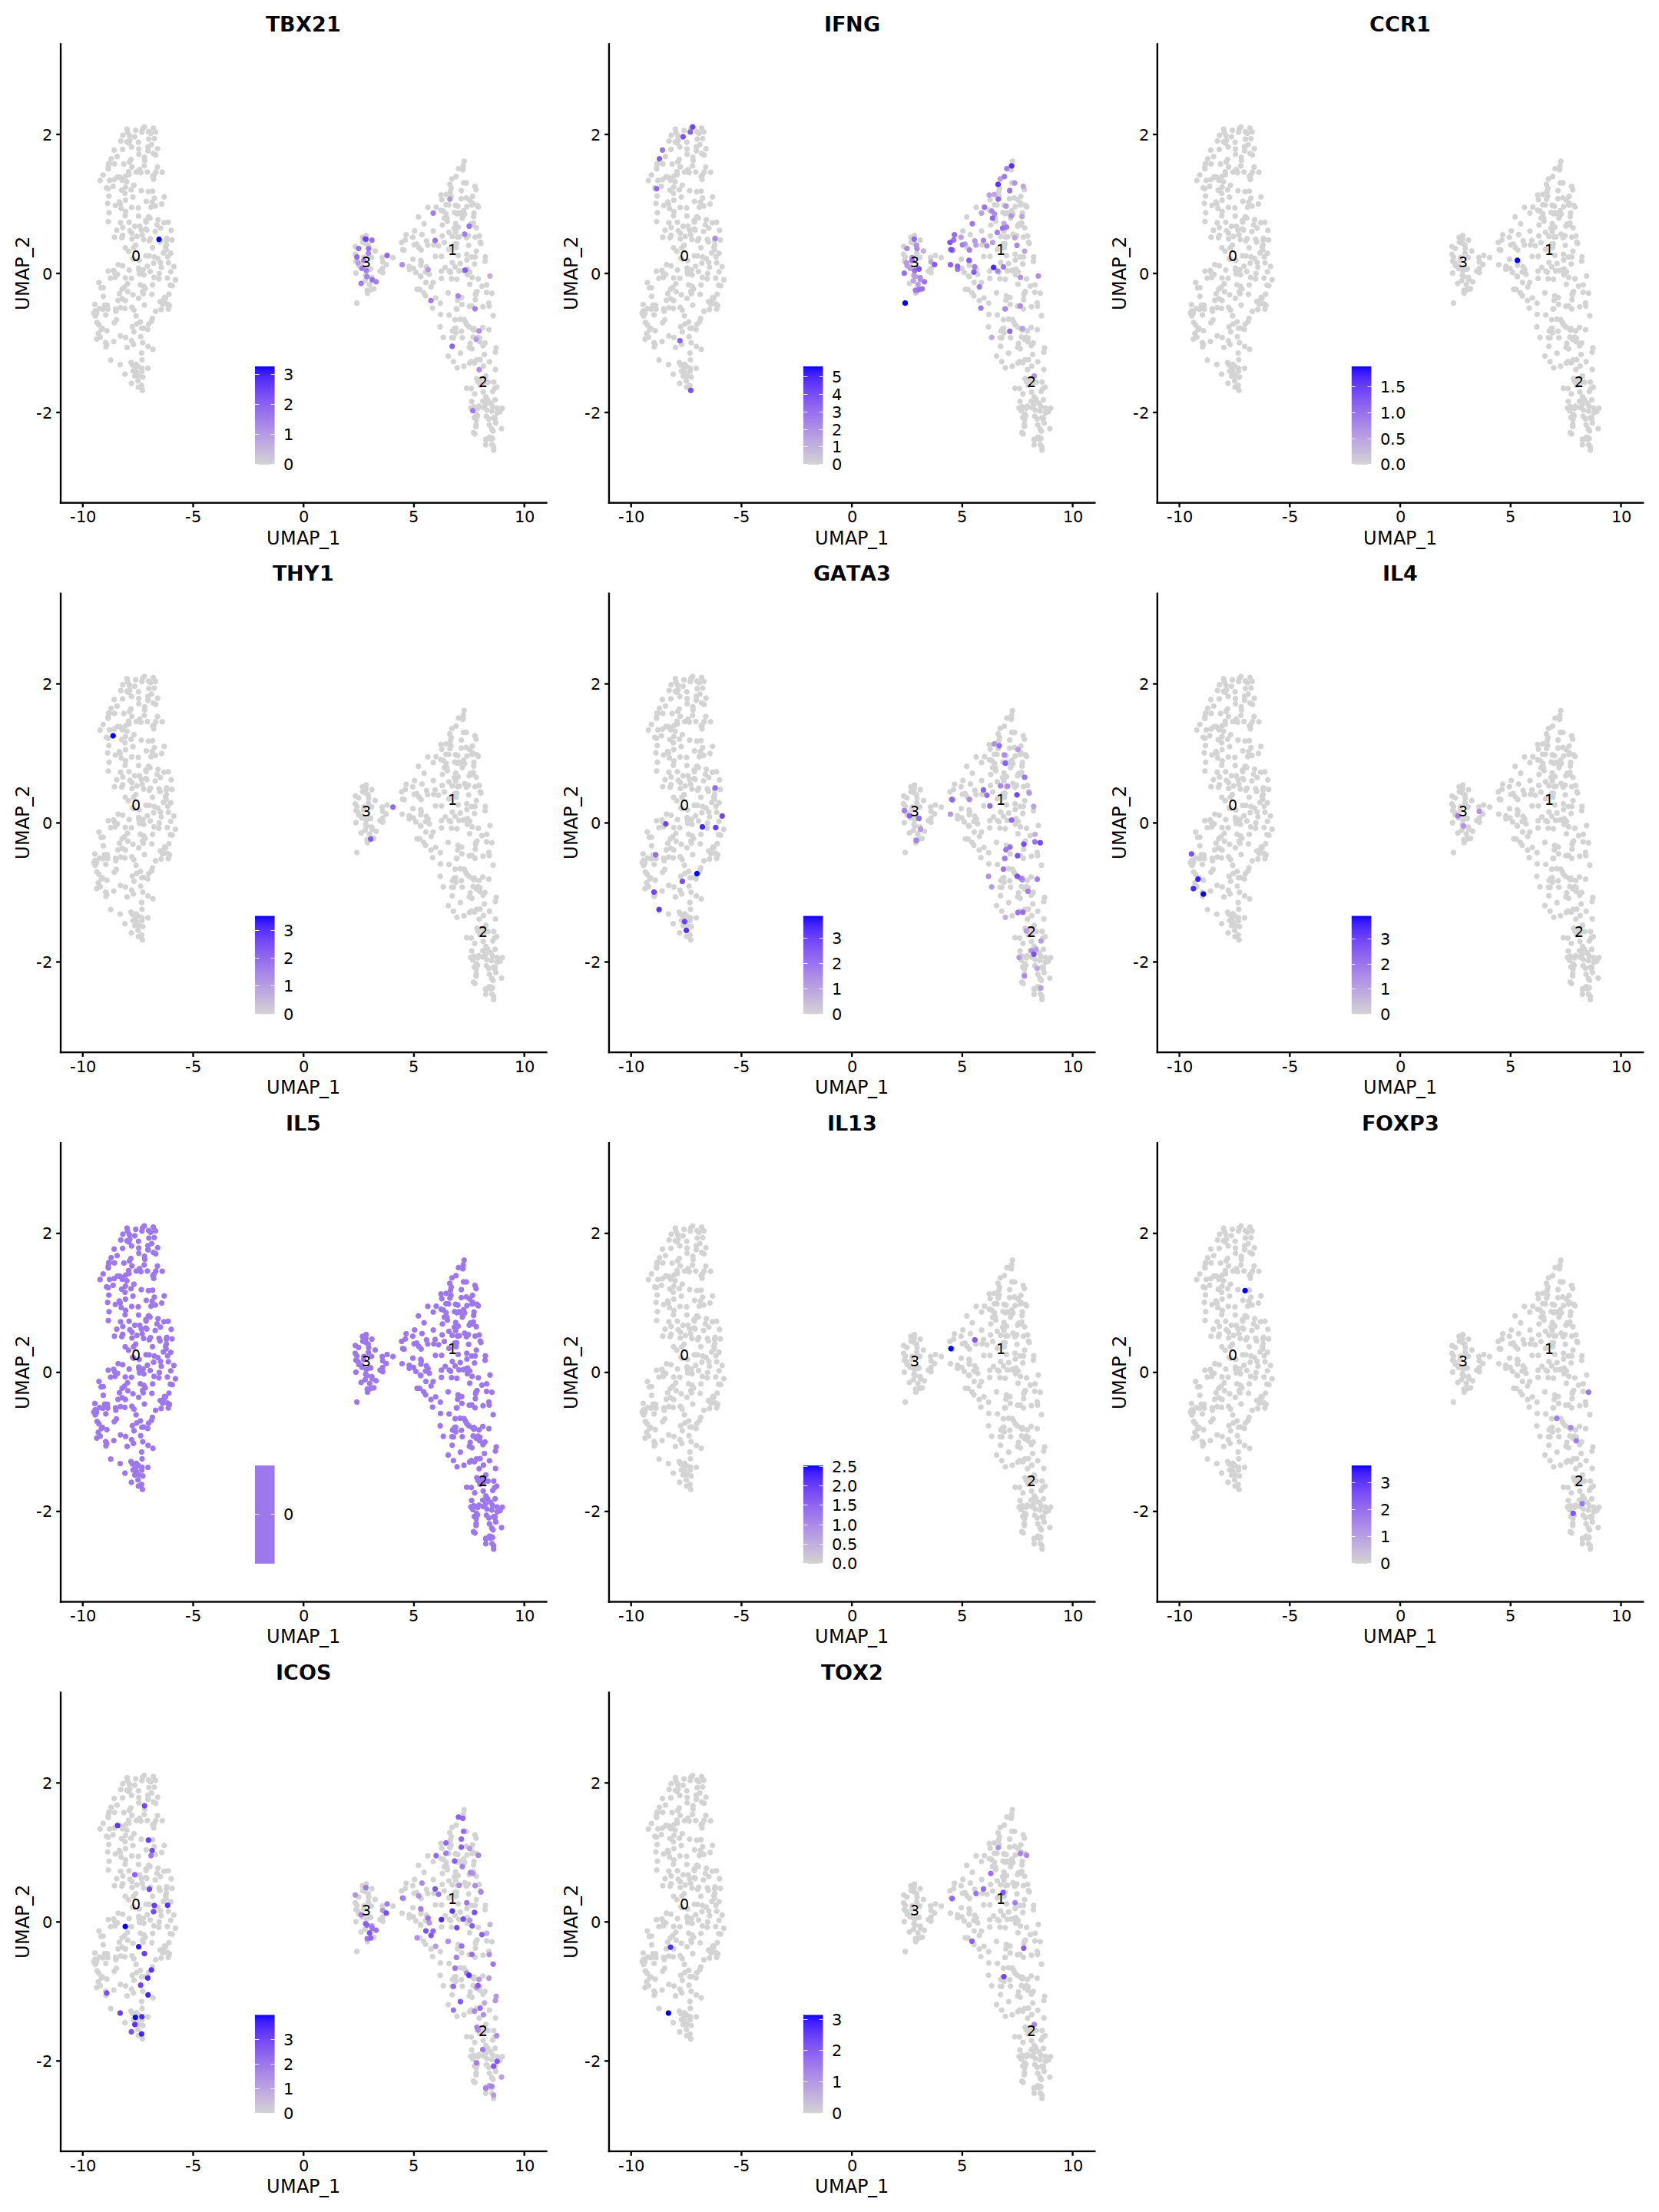

In [70]:
o(6*3, 6*4)
Idents(t.cd4)<-"RNA_snn_res.0.5"
FeaturePlot(t.cd4,order=T,n=3, label=T,
            features = c("TBX21","IFNG","CCR1","THY1","GATA3","IL4","IL5","IL13",
                         "FOXP3","ICOS","TOX2")
           )&theme(legend.position = c(0.4,0.2))

In [ ]:
t.cd4 <- RenameIdents(t.cd4, "0"="Tcm", "1"="Tem", "2"="Tcm", "3"="Th1")
Idents(t.cd4)->t.cd4[["CD4sub"]]

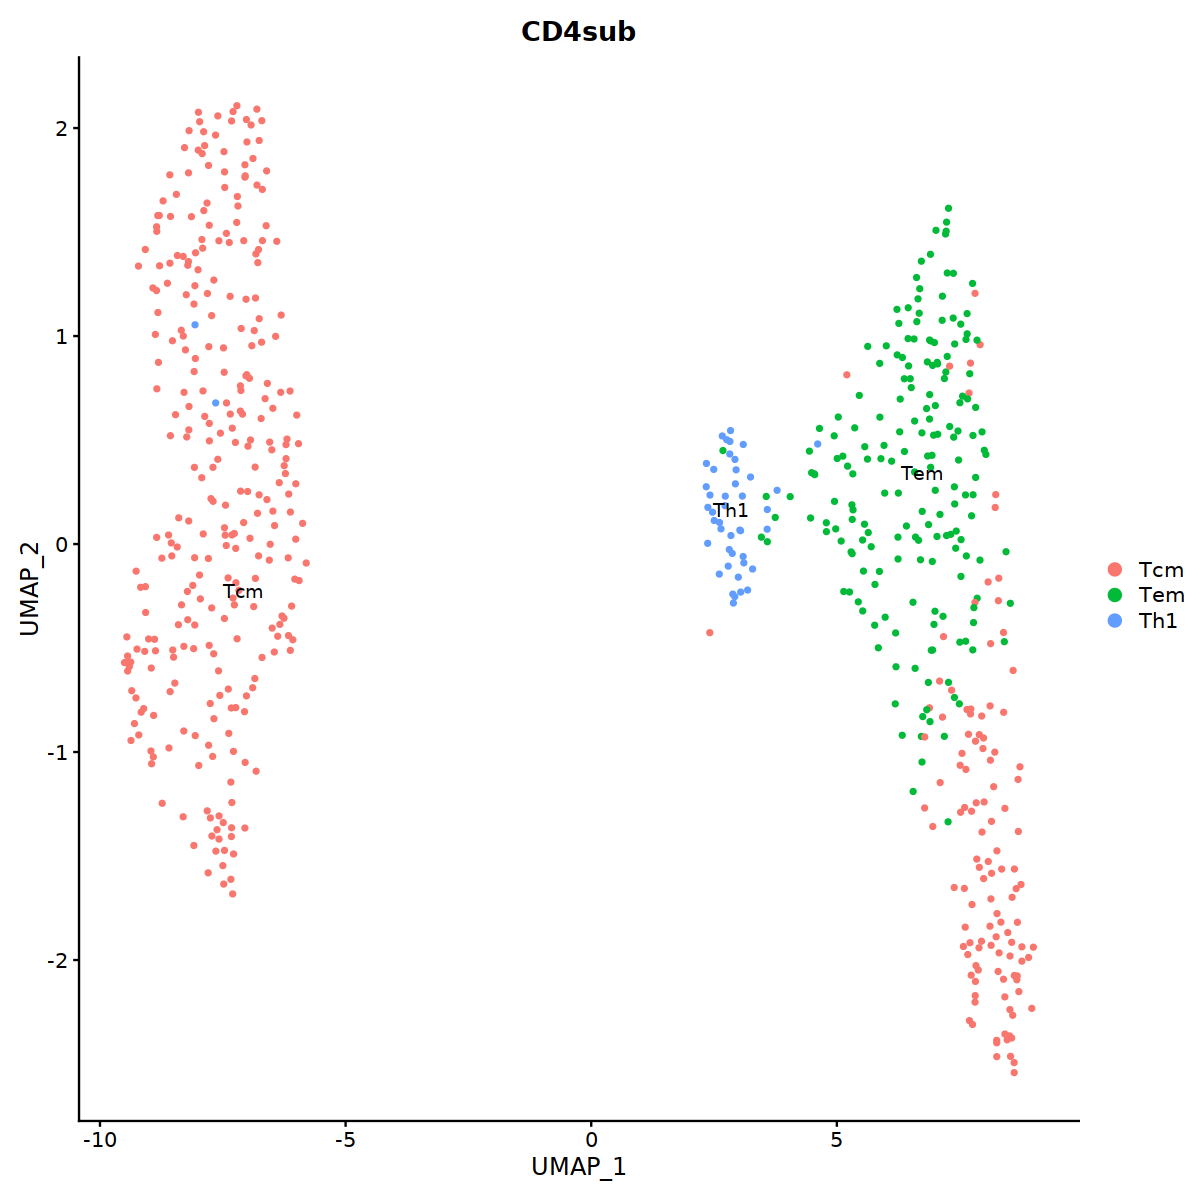

In [79]:
o(10,10)
DimPlot(t.cd4, label=T, group.by="CD4sub")

In [77]:
save(t.cd4, file = "t.cd4.annot.rda")